In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import plotly.plotly as py
import plotly.graph_objs as go

import requests

from utils import utils_v2
plt.rcParams['figure.figsize'] = (15, 7) 
%matplotlib inline

In [2]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data.drop('Timestamp',axis=1,inplace = True)
data['Date'] = data.timestamp.dt.date
data = data.set_index('timestamp');

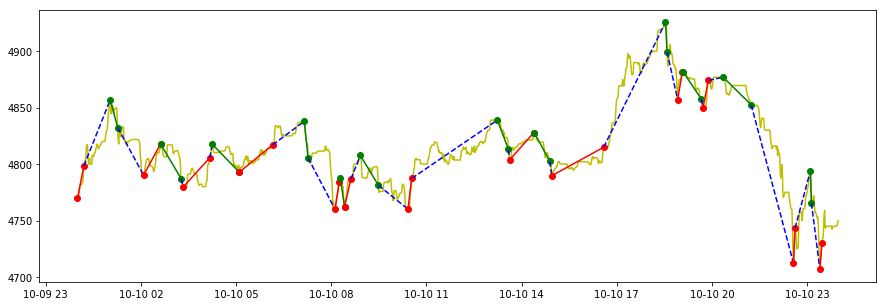

In [4]:
date = '2017 Oct 10'
    
stock_series = data.loc[date]['Weighted_Price']

DCA, CPA = utils_v2.get_events(stock_series,threshold = 0.005)
    
utils_v2.plot_events(stock_series,DCA,CPA)

In [5]:
DDCstar = []
threshold = 0.005
    
for i in range(len(DCA)):
    if stock_series[DCA[i]] > stock_series[CPA[i]]:
        DDCstar.append(stock_series[DCA[i]] * (1 - threshold))
    else:
        DDCstar.append(stock_series[DCA[i]] * (1 + threshold))

In [6]:
DDCstar_time = []

for i in range(len(DCA)):
    DDCstar_time.append(np.divide(np.multiply(np.subtract(DDCstar[i],stock_series[CPA[i]-1]),np.subtract(stock_series.index[CPA[i]],stock_series.index[CPA[i]-1])),np.subtract(stock_series[CPA[i]],stock_series[CPA[i]-1]))+stock_series.index[CPA[i]-1])

In [7]:
values_up = []
index_up = []

values_down = []
index_down = []

if stock_series[DCA[0]] > DDCstar[0]:
    for i in range(0,len(DCA),2):    
                values_down.append(stock_series[DCA[i]])
                values_down.append(DDCstar[i])
                if i != len(DCA)-2:
                    values_down.append(None)
                
                if i != len(DCA)-1: 
                    values_up.append(stock_series[DCA[i+1]])
                    values_up.append(DDCstar[i+1])
                    if i != len(DCA)-2:
                        values_up.append(None)
                    
                index_down.append(stock_series.index[DCA[i]])
                index_down.append(DDCstar_time[i])
                if i != len(DCA)-2:
                    index_down.append(None)
                
                if i != len(DCA)-1:
                    index_up.append(stock_series.index[DCA[i+1]])
                    index_up.append(DDCstar_time[i+1])
                    if i != len(DCA)-2:
                        index_up.append(None)
else:
    for i in range(0,len(DCA),2):    
                values_up.append(stock_series[DCA[i]])
                values_up.append(DDCstar[i])
                if i != len(DCA)-2:
                    values_up.append(None)
                
                if i != len(DCA)-1:
                    values_down.append(stock_series[DCA[i+1]])
                    values_down.append(DDCstar[i+1])
                    if i != len(DCA)-2:
                        values_down.append(None)
                    
                index_up.append(stock_series.index[DCA[i]])
                index_up.append(DDCstar_time[i])
                if i != len(DCA)-2:
                    index_up.append(None)
                
                if i != len(DCA)-1:
                    index_down.append(stock_series.index[DCA[i+1]])
                    index_down.append(DDCstar_time[i+1])
                    if i != len(DCA)-2:
                        index_down.append(None)
                

OS_values = []
OS_index = []

for i in range(len(DCA)):    
            if i != len(DCA)-1:
                OS_values.append(DDCstar[i])
                OS_values.append(stock_series[DCA[i+1]])
                if i != len(DCA)-2:
                    OS_values.append(None)
                
            if i != len(DCA)-1:
                OS_index.append(DDCstar_time[i])
                OS_index.append(stock_series.index[DCA[i+1]])
                if i != len(DCA)-2:
                    OS_index.append(None)

In [8]:

r = requests.get('https://plot.ly/~manuel.morais/82.json')

t = r.json()

layout = t['layout']

In [9]:
t['data'][0]['x']=stock_series.index
t['data'][0]['y']=stock_series.values
t['data'][1]['x']=OS_index
t['data'][1]['y']=OS_values
t['data'][2]['x']=index_down
t['data'][2]['y']=values_down
t['data'][3]['x']=index_up
t['data'][3]['y']=values_up

In [10]:
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Price',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]}]),
            dict(label = 'Overshoot',
                 method = 'update',
                 args = [{'visible': [False, True, False, False]}]),
            dict(label = 'Down',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]}]),
            dict(label = 'Up',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]}])
        ]),
    )
])


In [11]:
t['layout']['updatemenus'] = updatemenus

In [12]:
fig = dict(data=t['data'],layout=t['layout'])
py.iplot(fig, filename = "Newv2")

In [13]:
table = pd.DataFrame(columns=['NDC','PC','MedianOSV_overall','MedianTM_overall','MedianT_overall','MedianR_DC_overall'])

In [14]:
table, OSV = utils_v2.event_summary(stock_series,DCA,CPA,table,threshold = 0.005)

ValueError: too many values to unpack (expected 2)

In [ ]:
table

In [ ]:
OSV_up = [value for value in OSV if value >= 0]
OSV_down = [value for value in OSV if value < 0]

In [ ]:
OSV_down = pd.DataFrame(OSV_down,columns= ['OSV_down'])
OSV_up = pd.DataFrame(OSV_up,columns= ['OSV_up'])

In [ ]:
OSV_DataFrame = OSV_up.describe()
OSV_DataFrame['OSV_down'] = OSV_down.describe()

In [ ]:
OSV_DataFrame